# Merge Fors2, Galex and Kids

In [1]:
import h5py
import pandas as pd
import numpy as np
import os
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
def GetColumnHfData(hff,list_of_keys,nameval):
    """
    Extract hff atttribute 
    
    parameters
      hff           : descriptor of h5 file
      list_of_keys : list of exposures
      nameval      : name of the attribute
      
    return
           the array of values in the order of 
    """
    all_data = []
    for key in list_of_keys:
        group=hff.get(key)
        val=group.attrs[nameval]
        all_data.append(val)
    return all_data


In [3]:
def ReadFors2h5FileAttributes(hf):
    hf =  h5py.File(input_file_h5, 'r') 
    list_of_keys = list(hf.keys())
    # pick one key    
    key_sel =  list_of_keys[0]
    # pick one group
    group = hf.get(key_sel)  
    #pickup all attribute names
    all_subgroup_keys = []
    for k in group.attrs.keys():
        all_subgroup_keys.append(k)
    # create info
    df_info = pd.DataFrame()
    for key in all_subgroup_keys:
        arr=GetColumnHfData(hf, list_of_keys ,key)
        df_info[key] = arr
    df_info.sort_values(by="num", ascending=True,inplace=True)
    df_info_num = df_info["num"].values
    key_tags = [ f"SPEC{num}" for num in df_info_num ]
    df_info["name"] = key_tags
    
    #'Nsp', 'RT', 'RV', 'Rmag', 'dec', 'eRV', 'lines', 'num', 'ra', 'redshift',
    
    df_info = df_info[['num' ,'name', 'ra', 'dec', 'Rmag','redshift','lines','RT','RV','eRV','Nsp']]
    return df_info

# Read Fors2

In [4]:
input_file_h5  = './data/FORS2spectra.hdf5'

In [5]:
hf =  h5py.File(input_file_h5, 'r') 
list_of_keys = list(hf.keys())

In [6]:
df_info = ReadFors2h5FileAttributes(hf)

In [7]:
df_info.reset_index(drop=True, inplace=True) 

In [8]:
df_info

,num,name,ra,dec,Rmag,redshift,lines,RT,RV,eRV,Nsp
0,2,SPEC2,13.52997,-28.44776,21.18,0.34555,"b'K,H,G,H{beta} ...",12.3,103665,40,1
1,3,SPEC3,13.52552,-28.42080,21.45,0.68660,"b'[OII],H9,K,H,H{beta},[OIII],H8 ...",11.6,210642,48,4
2,9,SPEC9,13.50219,-28.40641,21.60,0.29266,"b'H9,H8,K,H ...",13.1,87798,58,1
3,13,SPEC13,13.49261,-28.38272,23.14,0.68870,"b'[OII],H{epsilon},H{delta},H{beta} ...",0.0,206610,0,1
4,19,SPEC19,13.60758,-28.43452,21.70,0.48395,"b'H10,H9,H8,K,H,H{delta} ...",7.1,145185,104,1
...,...,...,...,...,...,...,...,...,...,...,...
545,734,SPEC734,13.68083,-28.23290,0.00,0.23012,"b'[OII],H9,K,H,H{alpha},NII ...",7.2,69036,71,1
546,735,SPEC735,13.69958,-28.23161,19.28,0.36169,"b'K,H,G,H{beta} ...",8.2,108507,107,1
547,736,SPEC736,13.66431,-28.22849,21.64,0.55777,"b'[OII],H9,H{beta},[OIII] ...",10.5,167331,31,1
548,737,SPEC737,13.62722,-28.22692,21.40,0.52001,"b'[OII],K,H ...",10.2,156003,53,1


### Get Spectra

In [9]:
df_info_num = df_info["num"].values
key_tags = [ f"SPEC{num}" for num in df_info_num ]

In [10]:
all_df = []   
idx=0
for key in key_tags :
    group = hf.get(key)
    df = pd.DataFrame()
    df["wl"] = np.array(group.get("wl"))
    df["fl"] = np.array(group.get("fl")) 
    all_df.append(df)
    idx+=1

# Get merged catalogs

In [11]:
catalog_galex_filename = "data/info_fors2Galexcrossmatch.csv"
catalog_kids_filename = "data/info_fors2Kidscrossmatch.csv"

In [12]:
df_info_galex = pd.read_csv(catalog_galex_filename,index_col=0)

In [13]:
df_info_galex.rename(columns={"angularsep":"asep_galex"},inplace=True)

In [14]:
df_info_galex

,num,name,ra,dec,Rmag,redshift,lines,RT,RV,eRV,Nsp,objID,survey,ra_galex,dec_galex,fuv_mag,nuv_mag,asep_galex
0,2,SPEC2,13.52997,-28.44776,21.18,0.34555,"b'K,H,G,H{beta} ...",12.3,103665,40,1,6380802579079627441,AIS,13.531423,-28.456012,20.422865,21.145170,30.060347
1,3,SPEC3,13.52552,-28.42080,21.45,0.68660,"b'[OII],H9,K,H,H{beta},[OIII],H8 ...",11.6,210642,48,4,6380802579077530499,AIS,13.524429,-28.415100,NaN,22.173336,20.808473
2,9,SPEC9,13.50219,-28.40641,21.60,0.29266,"b'H9,H8,K,H ...",13.1,87798,58,1,6380802579077530534,AIS,13.493582,-28.404687,NaN,21.510794,27.954317
3,13,SPEC13,13.49261,-28.38272,23.14,0.68870,"b'[OII],H{epsilon},H{delta},H{beta} ...",0.0,206610,0,1,6380802579077530647,AIS,13.488292,-28.374033,NaN,22.629692,34.131891
4,19,SPEC19,13.60758,-28.43452,21.70,0.48395,"b'H10,H9,H8,K,H,H{delta} ...",7.1,145185,104,1,6380802579077530370,AIS,13.602319,-28.443209,NaN,21.152737,35.437832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,734,SPEC734,13.68083,-28.23290,0.00,0.23012,"b'[OII],H9,K,H,H{alpha},NII ...",7.2,69036,71,1,6380802579079628326,AIS,13.672907,-28.231896,19.537182,16.488522,25.387088
546,735,SPEC735,13.69958,-28.23161,19.28,0.36169,"b'K,H,G,H{beta} ...",8.2,108507,107,1,6380802579079628405,AIS,13.687228,-28.226752,20.512026,20.175917,42.903491
547,736,SPEC736,13.66431,-28.22849,21.64,0.55777,"b'[OII],H9,H{beta},[OIII] ...",10.5,167331,31,1,6380802579079628326,AIS,13.672907,-28.231896,19.537182,16.488522,29.898930
548,737,SPEC737,13.62722,-28.22692,21.40,0.52001,"b'[OII],K,H ...",10.2,156003,53,1,6380802579079628409,AIS,13.628613,-28.230257,21.295267,21.704386,12.801767


In [15]:
df_info_kids = pd.read_csv(catalog_kids_filename,index_col=0)

In [16]:
df_info_kids.rename(columns={"angularsep":"asep_kids"},inplace=True)

In [17]:
df_info_kids

,num,ra,dec,Rmag,redshift,ID,KIDS_TILE,RAJ2000,DECJ2000,FLUX_RADIUS,...,MAG_GAAP_J,MAG_GAAP_H,MAG_GAAP_Ks,Z_B,Z_ML,EXTINCTION_u,EXTINCTION_g,EXTINCTION_r,EXTINCTION_i,asep_kids
0,2,13.52997,-28.44776,21.18,0.34555,KiDSDR4 J005407.202-282652.18,KIDS_13.5_-28.2,13.530012,-28.447828,2.967994,...,20.104790,19.715614,19.371752,0.64,0.65,0.072517,0.056505,0.039090,0.029048,0.278569
1,3,13.52552,-28.42080,21.45,0.68660,KiDSDR4 J005406.135-282515.22,KIDS_13.5_-28.2,13.525566,-28.420897,3.020974,...,20.078465,19.827843,19.368172,0.76,0.76,0.075065,0.058490,0.040463,0.030069,0.378354
2,9,13.50219,-28.40641,21.60,0.29266,KiDSDR4 J005400.531-282423.36,KIDS_13.5_-28.2,13.502216,-28.406491,2.671784,...,20.840393,20.583025,20.517725,0.38,0.24,0.074299,0.057893,0.040050,0.029762,0.303000
3,13,13.49261,-28.38272,23.14,0.68870,KiDSDR4 J005358.235-282258.04,KIDS_13.5_-28.2,13.492649,-28.382790,2.192928,...,22.204744,NaN,NaN,0.79,0.79,0.077572,0.060444,0.041815,0.031073,0.280645
4,19,13.60758,-28.43452,21.70,0.48395,KiDSDR4 J005425.830-282604.52,KIDS_13.5_-28.2,13.607625,-28.434589,2.992076,...,20.676168,20.508581,20.214029,0.38,0.39,0.075642,0.058940,0.040774,0.030300,0.286350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,734,13.68083,-28.23290,0.00,0.23012,KiDSDR4 J005443.393-281358.14,KIDS_13.5_-28.2,13.680807,-28.232817,3.462931,...,19.286404,19.034557,19.066914,0.16,0.15,0.073033,0.056906,0.039368,0.029254,0.307576
546,735,13.69958,-28.23161,19.28,0.36169,KiDSDR4 J005447.902-281354.13,KIDS_13.5_-28.2,13.699594,-28.231703,3.587435,...,18.406120,18.052334,17.985865,0.40,0.40,0.072326,0.056356,0.038987,0.028971,0.337732
547,736,13.66431,-28.22849,21.64,0.55777,KiDSDR4 J005439.434-281343.01,KIDS_13.5_-28.2,13.664309,-28.228614,4.769248,...,21.366528,21.771448,21.278240,0.55,0.56,0.074087,0.057728,0.039936,0.029677,0.446411
548,737,13.62722,-28.22692,21.40,0.52001,KiDSDR4 J005430.535-281337.17,KIDS_13.5_-28.2,13.627233,-28.226992,2.864109,...,20.178650,19.833088,19.671566,0.70,0.70,0.079347,0.061827,0.042772,0.031784,0.262459


## Merge dataframes

In [18]:
df = pd.merge(df_info_galex,df_info_kids)

In [19]:
df

,num,name,ra,dec,Rmag,redshift,lines,RT,RV,eRV,...,MAG_GAAP_J,MAG_GAAP_H,MAG_GAAP_Ks,Z_B,Z_ML,EXTINCTION_u,EXTINCTION_g,EXTINCTION_r,EXTINCTION_i,asep_kids
0,2,SPEC2,13.52997,-28.44776,21.18,0.34555,"b'K,H,G,H{beta} ...",12.3,103665,40,...,20.104790,19.715614,19.371752,0.64,0.65,0.072517,0.056505,0.039090,0.029048,0.278569
1,3,SPEC3,13.52552,-28.42080,21.45,0.68660,"b'[OII],H9,K,H,H{beta},[OIII],H8 ...",11.6,210642,48,...,20.078465,19.827843,19.368172,0.76,0.76,0.075065,0.058490,0.040463,0.030069,0.378354
2,9,SPEC9,13.50219,-28.40641,21.60,0.29266,"b'H9,H8,K,H ...",13.1,87798,58,...,20.840393,20.583025,20.517725,0.38,0.24,0.074299,0.057893,0.040050,0.029762,0.303000
3,13,SPEC13,13.49261,-28.38272,23.14,0.68870,"b'[OII],H{epsilon},H{delta},H{beta} ...",0.0,206610,0,...,22.204744,NaN,NaN,0.79,0.79,0.077572,0.060444,0.041815,0.031073,0.280645
4,19,SPEC19,13.60758,-28.43452,21.70,0.48395,"b'H10,H9,H8,K,H,H{delta} ...",7.1,145185,104,...,20.676168,20.508581,20.214029,0.38,0.39,0.075642,0.058940,0.040774,0.030300,0.286350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,734,SPEC734,13.68083,-28.23290,0.00,0.23012,"b'[OII],H9,K,H,H{alpha},NII ...",7.2,69036,71,...,19.286404,19.034557,19.066914,0.16,0.15,0.073033,0.056906,0.039368,0.029254,0.307576
546,735,SPEC735,13.69958,-28.23161,19.28,0.36169,"b'K,H,G,H{beta} ...",8.2,108507,107,...,18.406120,18.052334,17.985865,0.40,0.40,0.072326,0.056356,0.038987,0.028971,0.337732
547,736,SPEC736,13.66431,-28.22849,21.64,0.55777,"b'[OII],H9,H{beta},[OIII] ...",10.5,167331,31,...,21.366528,21.771448,21.278240,0.55,0.56,0.074087,0.057728,0.039936,0.029677,0.446411
548,737,SPEC737,13.62722,-28.22692,21.40,0.52001,"b'[OII],K,H ...",10.2,156003,53,...,20.178650,19.833088,19.671566,0.70,0.70,0.079347,0.061827,0.042772,0.031784,0.262459


# Select good match with galex

array([[<Axes: title={'center': 'asep_galex'}>]], dtype=object)

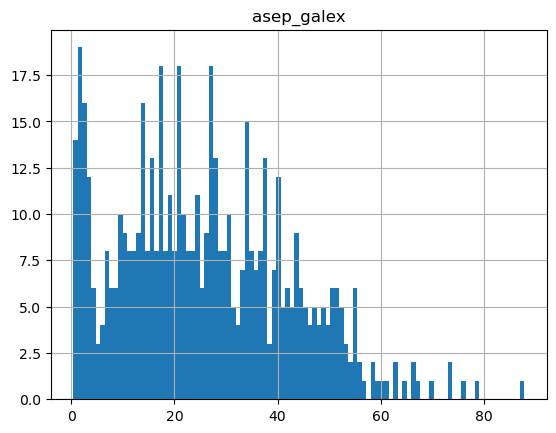

In [20]:
df.hist("asep_galex",bins=100)

array([[<Axes: title={'center': 'asep_kids'}>]], dtype=object)

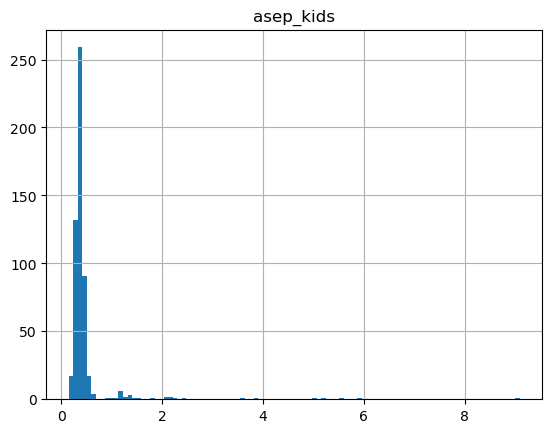

In [21]:
df.hist("asep_kids",bins=100)

In [22]:
df = df[df["asep_galex"] < 5]

## Remove NaN

In [23]:
df = df.dropna()

# Plot Spectra

https://en.wikipedia.org/wiki/Photometric_system

In [24]:
lambda_FUV = 1528.
lambda_NUV = 2271.
lambda_U = 3650.
lambda_B = 4450.
lambda_G = 4640.
lambda_R = 5580.
lambda_I = 8060.
lambda_Z = 9000.
lambda_Y = 10200.
lambda_J = 12200.
lambda_H = 16300.
lambda_K = 21900.
lambda_L = 34500.

WL = [lambda_FUV, lambda_NUV, lambda_B, lambda_G, lambda_R ,lambda_I, lambda_Z, lambda_Y, lambda_J, lambda_H, lambda_K ]

In [25]:
df

,num,name,ra,dec,Rmag,redshift,lines,RT,RV,eRV,...,MAG_GAAP_J,MAG_GAAP_H,MAG_GAAP_Ks,Z_B,Z_ML,EXTINCTION_u,EXTINCTION_g,EXTINCTION_r,EXTINCTION_i,asep_kids
113,242,SPEC242,13.53138,-28.45612,18.83,0.07474,"b'[OIII],H{alpha} ...",6.9,22421,62,...,19.234184,19.093273,19.181992,0.09,0.09,0.071955,0.056067,0.038787,0.028823,0.424304
241,399,SPEC399,13.58484,-28.47373,20.63,0.33646,"b'[OII],H{gamma},H{beta},[OIII],H{alpha} ...",17.8,100938,19,...,20.888657,21.088202,20.417109,0.37,0.37,0.074516,0.058063,0.040167,0.029849,0.319548
275,434,SPEC434,13.58520,-28.47238,22.09,0.33557,"b'[OII],H{beta},[OIII],H{alpha} ...",10.0,100671,32,...,21.882654,22.727900,21.629910,0.37,0.38,0.074525,0.058070,0.040172,0.029852,0.343842
316,476,SPEC476,13.33535,-28.44850,19.01,0.21748,"b'[OIII],H{alpha} ...",13.2,65244,49,...,18.719271,18.603228,18.287029,0.66,0.66,0.071433,0.055660,0.038505,0.028613,0.419814
382,558,SPEC558,13.33559,-28.44980,21.43,0.50526,"b'[OII],H9,K,H,H{beta},[OIII] ...",6.7,151578,50,...,21.188890,21.368940,21.217236,0.52,0.51,0.071311,0.055565,0.038440,0.028565,0.401930
386,563,SPEC563,13.33078,-28.46810,17.58,0.10508,"b'H{delta},G,Mgb,NaD,H{alpha} ...",13.3,31524,26,...,17.172655,16.979935,16.970234,0.18,0.18,0.068531,0.053399,0.036941,0.027451,0.472522
463,647,SPEC647,13.62250,-28.31452,20.11,0.10485,"b'H{beta},[OIII],H{alpha} ...",23.1,31453,16,...,20.285040,20.207556,20.208746,0.09,0.09,0.074009,0.057667,0.039894,0.029645,0.257006
469,653,SPEC653,13.60537,-28.33924,19.85,0.27295,"b'[OII],H9,H8,K,H,H{beta},H{alpha} ...",11.4,81885,35,...,19.829351,19.830145,19.645437,0.33,0.33,0.076933,0.059946,0.041470,0.030817,0.356586
543,732,SPEC732,13.71984,-28.23666,19.24,0.16176,"b'H,K,H{gamma},H{beta},[OIII],H{alpha},NII ...",19.9,48526,18,...,19.320133,19.188305,19.225214,0.16,0.16,0.071652,0.055831,0.038624,0.028701,0.392222


In [26]:
df.columns

Index(['num', 'name', 'ra', 'dec', 'Rmag', 'redshift', 'lines', 'RT', 'RV',
       'eRV', 'Nsp', 'objID', 'survey', 'ra_galex', 'dec_galex', 'fuv_mag',
       'nuv_mag', 'asep_galex', 'ID', 'KIDS_TILE', 'RAJ2000', 'DECJ2000',
       'FLUX_RADIUS', 'CLASS_STAR', 'MAG_GAAP_u', 'MAG_GAAP_g', 'MAG_GAAP_r',
       'MAG_GAAP_i', 'MAG_GAAP_Z', 'MAG_GAAP_Y', 'MAG_GAAP_J', 'MAG_GAAP_H',
       'MAG_GAAP_Ks', 'Z_B', 'Z_ML', 'EXTINCTION_u', 'EXTINCTION_g',
       'EXTINCTION_r', 'EXTINCTION_i', 'asep_kids'],
      dtype='object')

<Axes: xlabel='RT', ylabel='MAG_GAAP_r'>

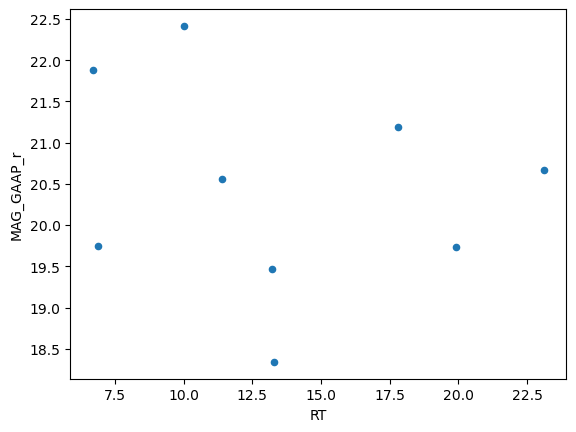

In [27]:
df.plot.scatter(x="RT",y="MAG_GAAP_r")

113  ==  242


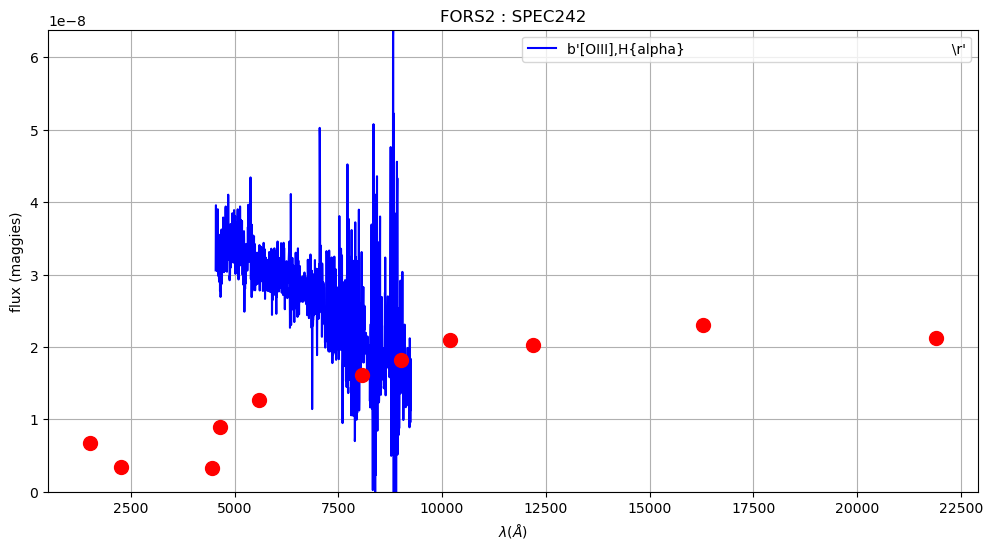

241  ==  399


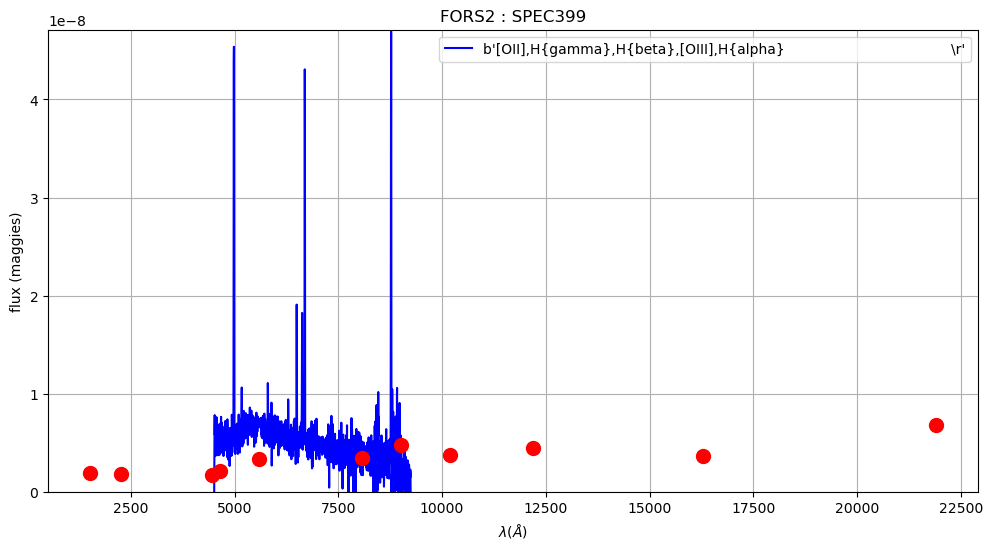

275  ==  434


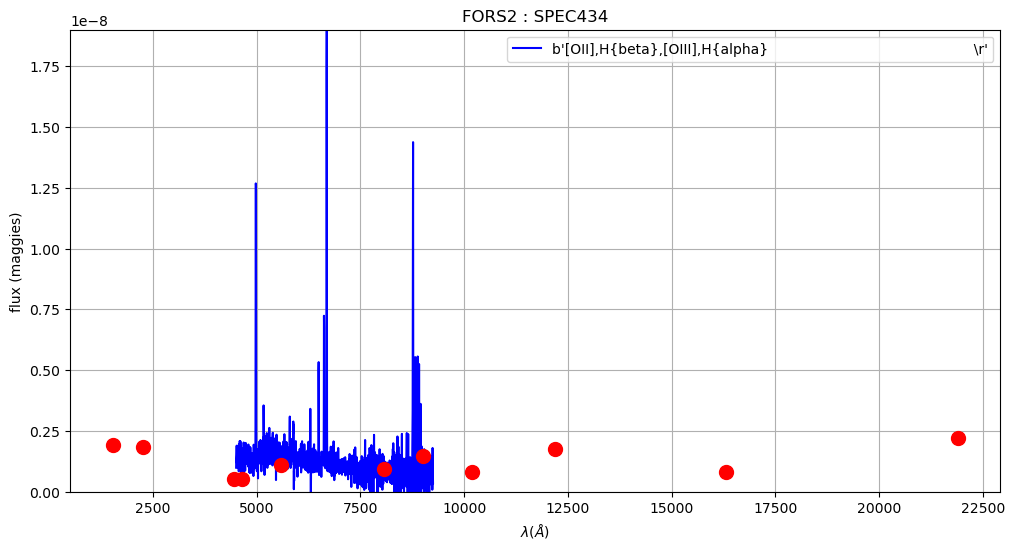

316  ==  476


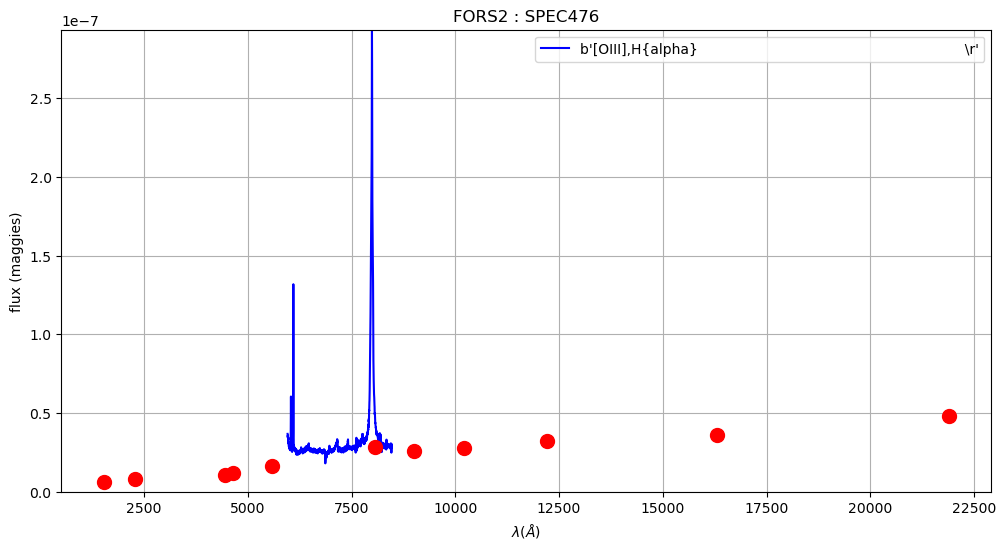

382  ==  558


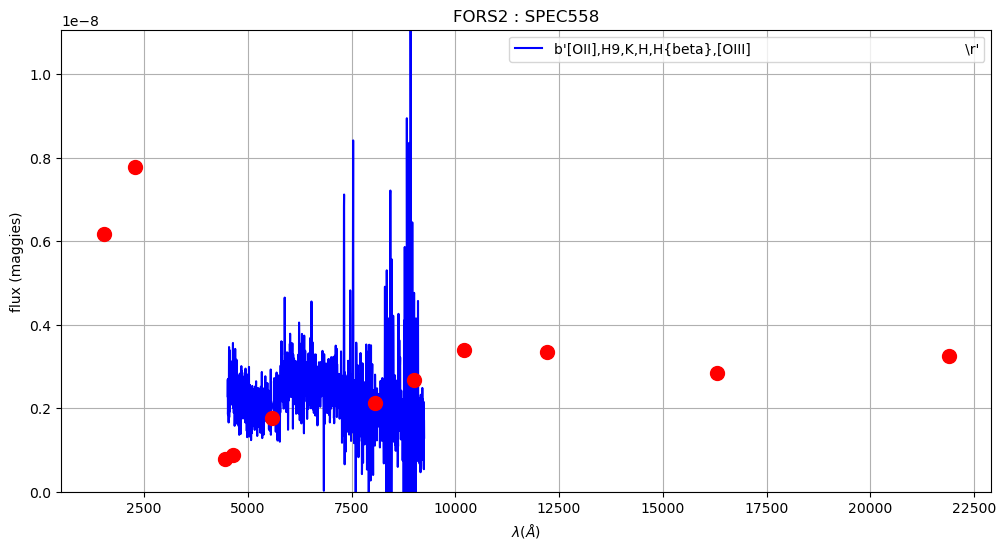

386  ==  563


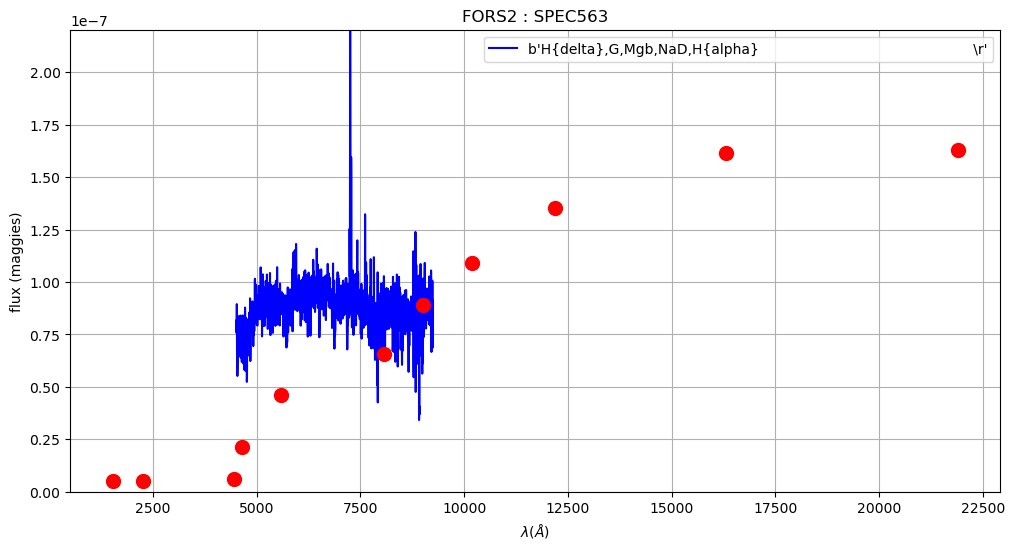

463  ==  647


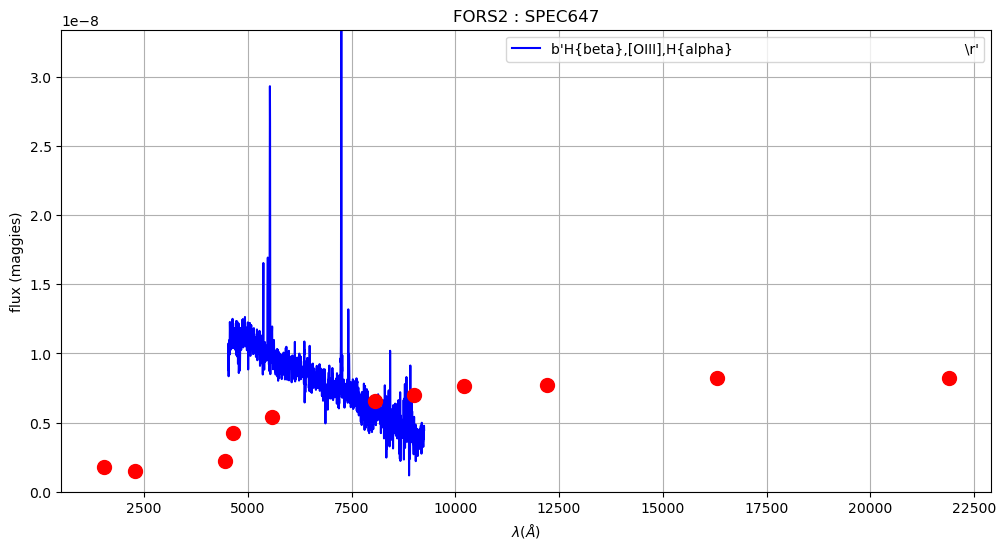

469  ==  653


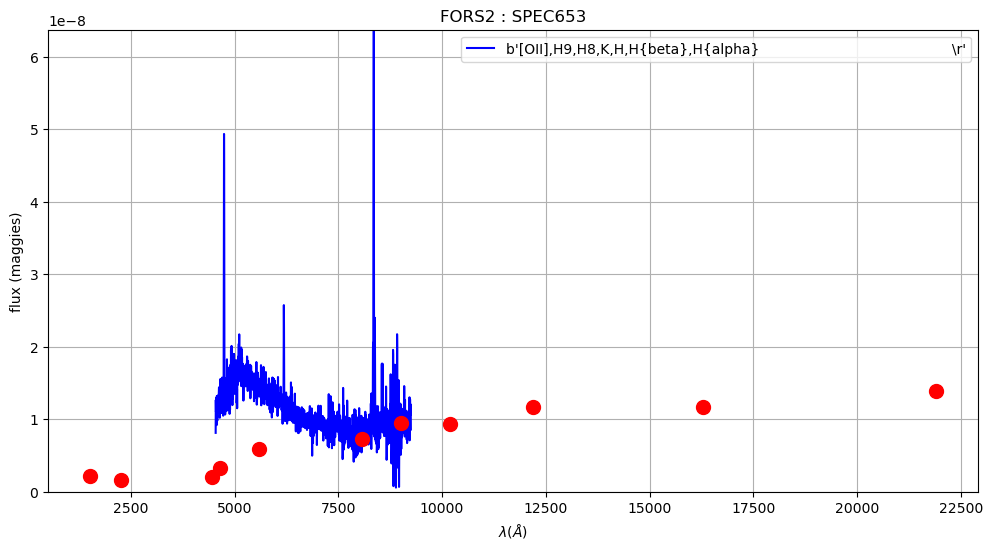

543  ==  732


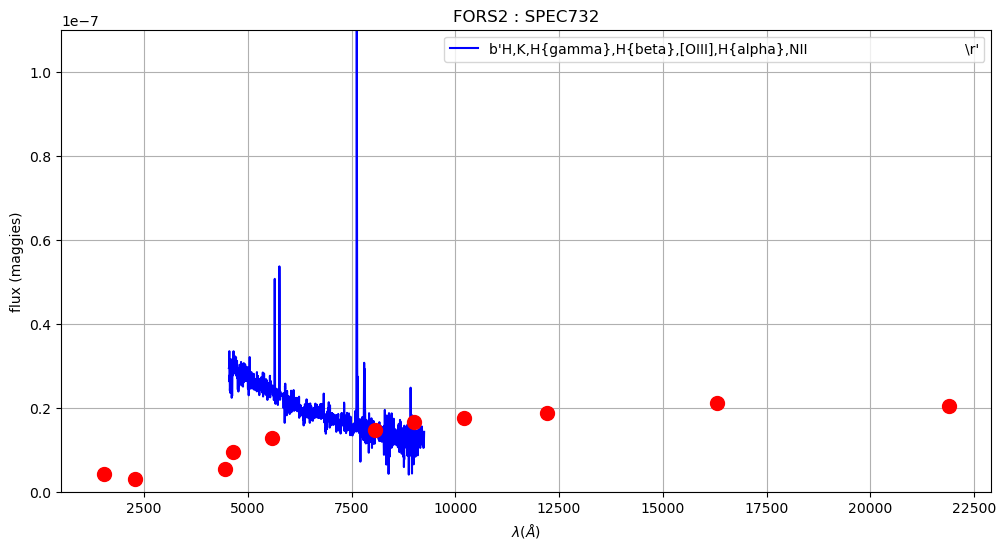

In [34]:
for idx,row in df.iterrows():
    print(idx," == ",row["num"])
    
    mags = [ row["fuv_mag"], row["nuv_mag"], row['MAG_GAAP_u'], row['MAG_GAAP_g'], row['MAG_GAAP_r'], row['MAG_GAAP_i'], row['MAG_GAAP_Z'], row['MAG_GAAP_Y'], 
            row['MAG_GAAP_J'], row['MAG_GAAP_H'],row['MAG_GAAP_Ks'] ]
    
    fluxes = [ 10**(-0.4*m) for m in mags ]
    fig = plt.figure(figsize=(12,6))
    ax=fig.add_subplot(1,1,1)
    ax.plot(all_df[idx]["wl"], all_df[idx]["fl"],'b-',label=row["lines"])
    ax.plot(WL,fluxes,'or',ms=10)

    ax.set_xlabel("$\lambda  (\AA)$ ")
    title = f"FORS2 : {key_tags[idx]}"
    ax.set_title(title)
    ax.set_ylabel("flux (maggies)")
    ax.legend()
    ax.grid()
    
    the_max = np.max(all_df[idx]["fl"])
    
    ax.set_ylim(0,the_max)
    
    plt.show()